# StatsModels
statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.

In other words, this package has all the **classic models from a traditional econometrics course**. Here, we are going to give some examples.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns  # we are going to grab example data from seaborn's dataset

In [2]:
def get_SGS_data(series_id, series_name):
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{str(series_id)}/dados?formato=json'
    df = pd.read_json(url)
    df = df.set_index(pd.to_datetime(df['data'], dayfirst=True)).drop('data', axis='columns')
    df.columns = [series_name]
    return df

# Linear Regression
In this example we are going to use the "tips" dataset.

In [3]:
tips = sns.load_dataset("tips")
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
38,18.69,2.31,Male,No,Sat,Dinner,3
211,25.89,5.16,Male,Yes,Sat,Dinner,4
4,24.59,3.61,Female,No,Sun,Dinner,4
135,8.51,1.25,Female,No,Thur,Lunch,2
64,17.59,2.64,Male,No,Sat,Dinner,3
36,16.31,2.00,Male,No,Sat,Dinner,3
145,8.35,1.50,Female,No,Thur,Lunch,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
96,27.28,4.00,Male,Yes,Fri,Dinner,2
69,15.01,2.09,Male,Yes,Sat,Dinner,2


Let's make a simple regression

$$
tip = \beta_{0} + \beta_{1} total\_bill + \beta_{2} size + \varepsilon
$$

One way we can handle this regression is the traditional way: defining the $X$ and $y$ matrices

In [11]:
y = tips['tip'].values
X = tips[['total_bill', 'size']].values
X = sm.add_constant(X)
X

array([[ 1.  , 16.99,  2.  ],
       [ 1.  , 10.34,  3.  ],
       [ 1.  , 21.01,  3.  ],
       [ 1.  , 23.68,  2.  ],
       [ 1.  , 24.59,  4.  ],
       [ 1.  , 25.29,  4.  ],
       [ 1.  ,  8.77,  2.  ],
       [ 1.  , 26.88,  4.  ],
       [ 1.  , 15.04,  2.  ],
       [ 1.  , 14.78,  2.  ],
       [ 1.  , 10.27,  2.  ],
       [ 1.  , 35.26,  4.  ],
       [ 1.  , 15.42,  2.  ],
       [ 1.  , 18.43,  4.  ],
       [ 1.  , 14.83,  2.  ],
       [ 1.  , 21.58,  2.  ],
       [ 1.  , 10.33,  3.  ],
       [ 1.  , 16.29,  3.  ],
       [ 1.  , 16.97,  3.  ],
       [ 1.  , 20.65,  3.  ],
       [ 1.  , 17.92,  2.  ],
       [ 1.  , 20.29,  2.  ],
       [ 1.  , 15.77,  2.  ],
       [ 1.  , 39.42,  4.  ],
       [ 1.  , 19.82,  2.  ],
       [ 1.  , 17.81,  4.  ],
       [ 1.  , 13.37,  2.  ],
       [ 1.  , 12.69,  2.  ],
       [ 1.  , 21.7 ,  2.  ],
       [ 1.  , 19.65,  2.  ],
       [ 1.  ,  9.55,  2.  ],
       [ 1.  , 18.35,  4.  ],
       [ 1.  , 15.06,  2.  ],
       [ 1

In [12]:
results = sm.OLS(y, X).fit()
results.summary()  # try using print

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           9.67e-34
Time:                        21:01:49   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
x1             0.0927      0.009     10.172      0.000       0.075       0.111
x2             0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although defining the matrices works very well for putting models in production, it is not that intuitive to visualize your work
and it is not a friendly way to explore different specfications, specially if you start adding transformed variables or working with dummy variables.

That is where Statsmodels got some inspiration from R and built a functionality that allows you to specify models in the same way R does.

In [17]:
results = smf.ols('tip ~ total_bill + size', data=tips).fit()  # try including a categorical variable, like 'sex' or 'day'
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           9.67e-34
Time:                        21:02:53   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `results` varible stores everything you need from the output above and more

In [18]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


---
# SARIMA Models
Lets make an SARIMA model for the brazilian industrial production (not seasonaly adjusted). First step is to grab the industrial production series.

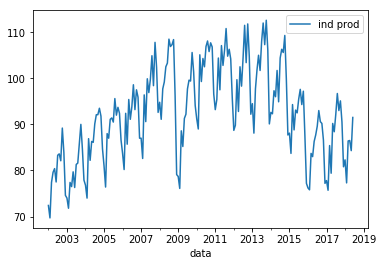

In [19]:
df = get_SGS_data(21859, 'ind prod')
df.index.freq='MS'
df.plot()

First thing to do is to look at the correlogram

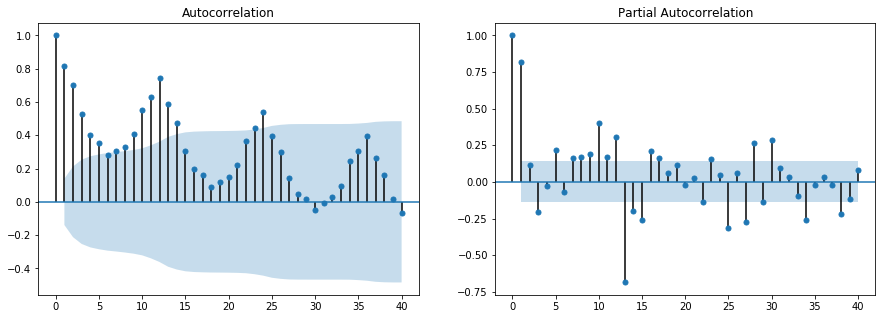

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig = sm.graphics.tsa.plot_acf(df['ind prod'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df['ind prod'], lags=40, ax=axes[1])

We can do an unit root test in order to see if we have to take the firt difference to model the series.

In [21]:
adf_test = sm.tsa.stattools.adfuller(df['ind prod'], regression='c', regresults=False)
adf_test[1]  # pvalue of the test

0.14788475478837637

We do not reject the null hypothesis, so the series of industrial production has a unit root.

Now let differentiate the series and look at the correlogram again.

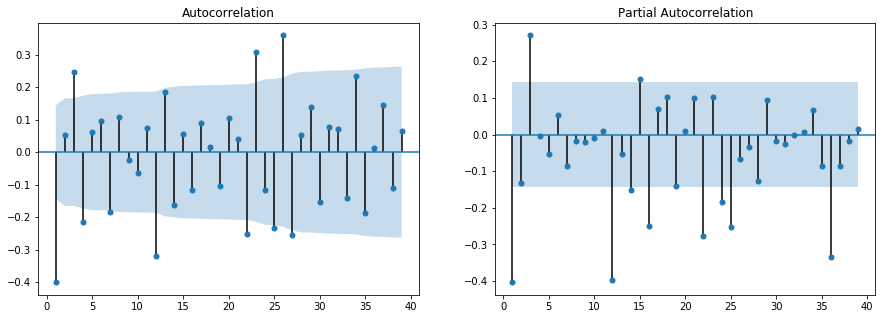

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig = sm.graphics.tsa.plot_acf(df['ind prod'].diff(1).diff(12).dropna(), lags=np.arange(1,40), ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df['ind prod'].diff(1).diff(12).dropna(), lags=np.arange(1,40), ax=axes[1])

We see that the ACF has significant values for in the lags that are a multiple of 12. Now we fit the model.

In [23]:
mod = sm.tsa.statespace.SARIMAX(df['ind prod'], order=(0,1,0), seasonal_order=(1,1,1,12))
res = mod.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           ind prod   No. Observations:                  198
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -476.977
Date:                            Sun, 26 Aug 2018   AIC                            959.955
Time:                                    21:06:05   BIC                            969.616
Sample:                                01-01-2002   HQIC                           963.870
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1967      0.116      1.698      0.090      -0.030       0.424
ma.S.L12      -0.9995     27.762     -0.036      0.971     -55.412      53.413
sigma2         8.6847    240.603      0.036      0.971    -462.889     480.258
===================================================================================
Ljung-Box (Q):                      202.46   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.00   Prob(JB):                         0.88
Heteroskedasticity (H):               1.23   Skew:                            -0.02
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now let's make a forecast based on the estimated model

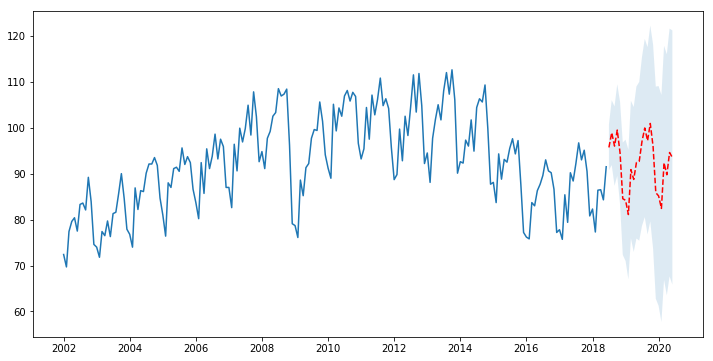

In [24]:
# generate predictions
last_date = df.index[-1]
predict = res.get_prediction(start=last_date+1, end=last_date+24)
predict_ci = predict.conf_int(alpha=0.1)

# generate chart
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df['ind prod'])
ax.plot(predict.predicted_mean, 'r--')
#ax.plot(predict.predicted_mean[-nforecast:], 'k--', linestyle='--', linewidth=2)
ax.fill_between(predict.predicted_mean.index, predict_ci['lower ind prod'], predict_ci['upper ind prod'], alpha=0.15)
plt.show()

---
# VAR Models

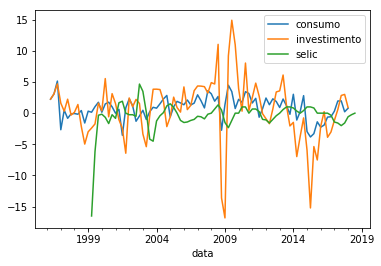

In [25]:
df = pd.DataFrame()
df = pd.concat([df, get_SGS_data(22110, 'consumo')], axis=1)
df = pd.concat([df, get_SGS_data(22113, 'investimento')], axis=1)
df = pd.concat([df, get_SGS_data(432, 'selic').resample('M').last()], axis=1)
df = df.resample('Q').mean().diff(1)

df.plot()

In [26]:
mod = sm.tsa.VARMAX(df, order=(2,0), trend='c')
res = mod.fit(maxiter=1000)  # VAR models tend take a while to converge, default is maxiter=50
res.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Dep. Variable:,"['consumo', 'investimento', 'selic']",No. Observations:,91
Model:,VAR(2),Log Likelihood,-543.678
,+ intercept,AIC,1141.357
Date:,"Sun, 26 Aug 2018",BIC,1209.150
Time:,21:09:11,HQIC,1168.707
Sample:,03-31-1996,,
,- 09-30-2018,,
Covariance Type:,opg,,
Ljung-Box (Q):,"nan, nan, nan",Jarque-Bera (JB):,"13.30, 19.03, 69.54"
Prob(Q):,"nan, nan, nan",Prob(JB):,"0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.93, 1.29, 0.07",Skew:,"-0.78, -0.79, 0.29"


## Impulse-Response Functions

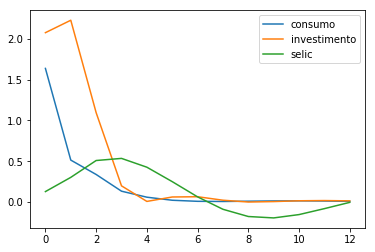

In [40]:
irf = res.impulse_responses(steps=12, impulse=0, orthogonalized=True, cumulative=False)
irf.plot()
plt.show()